<a href="https://colab.research.google.com/github/Taweilo/Mall_Customer_Segmentation/blob/main/Code_Mall_Customer_Segmenation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIT License

Copyright (c) 2023 Tawei Lo

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Mall Customer Segmenation Project

### By Tawei Lo

![Customer Segmentation](https://drive.google.com/uc?id=1sUvrCBeXJu_y4AiETX-HrYd608v0c5kV)

## 1. Introduction
### 1.1. Objective
The objective of this study is to utilize Machine Learning methods to perform customer segmentation. Customer segmentation involves dividing a market into distinct groups of customers who exhibit similar characteristics. By leveraging customer segmentation, companies can effectively identify and address unmet customer needs, gaining a competitive edge through the development of highly appealing products and services.

### 1.2. Method
Clustering, an unsupervised machine learning technique, is employed for customer segmentation. Clustering aims to discover inherent groups or clusters within data, without prior knowledge of their existence. The following highlights the advantages and disadvantages of utilizing clustering for customer segmentation.

**Advantages of clustering**:<br>

- Facilitates the identification of unexpected or unknown customer groups.
- Provides flexibility and can be applied to diverse datasets.
- Reduces the necessity for extensive expertise in understanding the relationship between customer demographics and behaviors.
- Offers quick and scalable analysis, even with large datasets.

**Disadvantages of clustering**:<br>
- Generated customer groups may lack interpretability and clarity.
- If the data does not incorporate customer behavior information, such as purchase history or service usage, the practical utilization of identified clusters might be challenging.

By considering these factors, businesses can make informed decisions when leveraging clustering techniques for customer segmentation, ensuring meaningful and actionable insights that drive strategic success.

In [ ]:
# import all library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data and check first five rows
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Data Understanding
2.1 Data source: This project is a part of the Mall Customer Segmentation Data competition held on Kaggle. <br>
2.2 Exploratory data analysis (EDA): it is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. The purpose is to understand data and encourage the following analytics. <br>
2.3 Feature engeering: this step is to clean data and deal with the data issue. Since our data is pretty clean, we just rename the feature in an intuitive way.

In [ ]:
# chech the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Observation**:  the DataFrame consists of 200 entries (rows) and 5 columns. And no missing data because all are not null. <br> Here's a description of each column:
1. CustomerID: It is of type int64 and represents the unique identifier for each customer.
2. Genre: It is of type object and represents the gender of the customer.
3. Age: It is of type int64 and represents the age of the customer.
4. Annual_Income_(k$): It is of type int64 and represents the annual income of the customer in thousands of dollars.
5. Spending_Score: It is of type int64 and represents the spending score of the customer.
Overall, the DataFrame contains columns with integer and object (string) data types. The memory usage of the DataFrame is approximately 7.9 KB.

In [ ]:
# chech the categorical data
df.Genre.unique()

array(['Male', 'Female'], dtype=object)

The format for two categorical data is fine in our dataset.

In [ ]:
# rename the column so it's easy to call
df.rename({'Genre':'Gender', \
           'Annual_Income_(k$)':'Income', \
'Spending_Score':'Spend_score'}, axis=1, \
inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# describe the data
df.describe()

,CustomerID,Age,Income,Spend_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Descriptive analyses**: These statistics provide an overview of the count, mean, standard deviation, minimum, 25th percentile (lower quartile), median (50th percentile), 75th percentile (upper quartile), and maximum values for each column in the dataset. The mean of the age is 38.85. Income: 60.56. Sped_score: 25.82. In addition, the median is very different from the mean which suggest the data is skewed.

### 2.2 Vizualization of each feature:  

#### 2.2.1.Gender

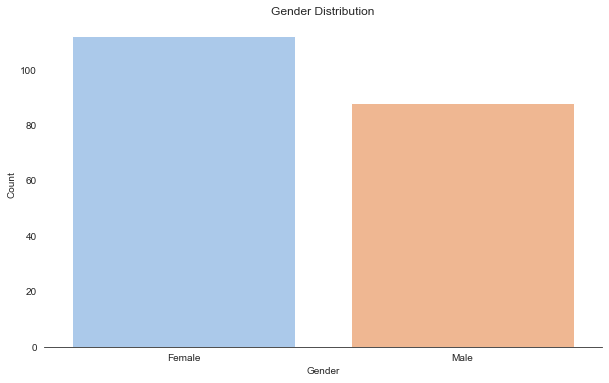

In [ ]:
genders = df.Gender.value_counts()

# Set the style and background color
sns.set_style("white")
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
sns.barplot(x=genders.index, y=genders.values)

# Remove grid lines
sns.despine(left=True)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

**Descriptive analyses** : Female customers are more than Male customers in our data frame.

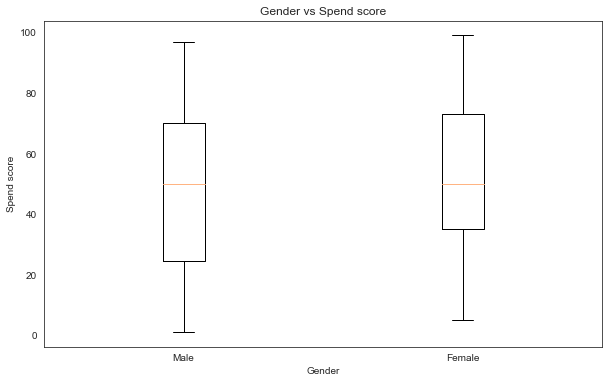

In [ ]:
sns.set_style("white")
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Gender'] == 'Male']['Spend_score'],
             df[df['Gender'] == 'Female']['Spend_score']])
plt.xticks([1, 2], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Spend score')
plt.title('Gender vs Spend score')
plt.show()

From the above boxplot, we can see the medain of Spend_score is similar between man and woman.
Next, we do a diagnosis analysis to check whether the spending score is the same. Since we don't know standard deviation pf the population, we do t-test for check the Spending score.

In [ ]:
import scipy.stats as stats

male_scores = df[df['Gender'] == 'Male']['Spend_score'] #subset data to get Male Spend_score
female_scores = df[df['Gender'] == 'Female']['Spend_score'] #subset data to get Female Spend_score

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(male_scores, female_scores)

alpha = 0.05  # significance level

print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject null hypothesis. There is a significant difference between male and female scores.")
else:
    print("Fail to reject null hypothesis. There is no significant difference between male and female scores.")

t-statistic: -0.8190464150660333
p-value: 0.4137446589852176
Fail to reject null hypothesis. There is no significant difference between male and female scores.


In [ ]:
male_scores = df[df['Gender'] == 'Male']['Age'] #subset data to get Male Age
female_scores = df[df['Gender'] == 'Female']['Age'] #subset data to get Female Age

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(male_scores, female_scores)

alpha = 0.05  # significance level

print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject null hypothesis. There is a significant difference between male and female scores.")
else:
    print("Fail to reject null hypothesis. There is no significant difference between male and female scores.")

t-statistic: 0.8580710366607083
p-value: 0.3918907377882569
Fail to reject null hypothesis. There is no significant difference between male and female scores.


In [ ]:
male_scores = df[df['Gender'] == 'Male']['Income'] #subset data to get Male Age
female_scores = df[df['Gender'] == 'Female']['Income'] #subset data to get Female Age

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(male_scores, female_scores)

alpha = 0.05  # significance level

print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject null hypothesis. There is a significant difference between male and female scores.")
else:
    print("Fail to reject null hypothesis. There is no significant difference between male and female scores.")

t-statistic: 0.795022298602198
p-value: 0.42755249399927864
Fail to reject null hypothesis. There is no significant difference between male and female scores.


From the p-vlaue associated with the t-test, it falls to reject the null hypothesis. We are reasobaly sure that Spending score is the same.

#### 2.2.2. Age

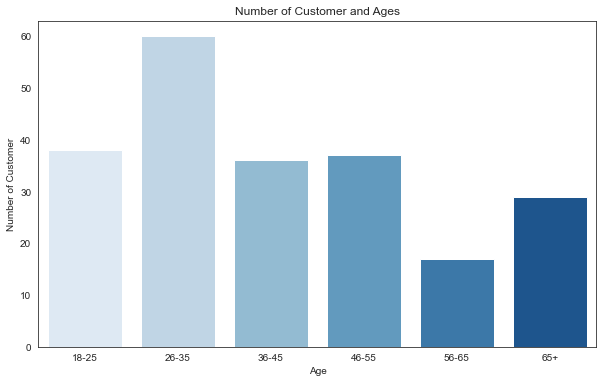

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("white")
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age56_65 = df.Age[(df.Age <= 65) & (df.Age >= 56)]
age_over65 = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","56-65","65+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values)
     ,len(age46_55.values),len(age56_65.values),len(age_over65.values)]
#plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="Blues")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

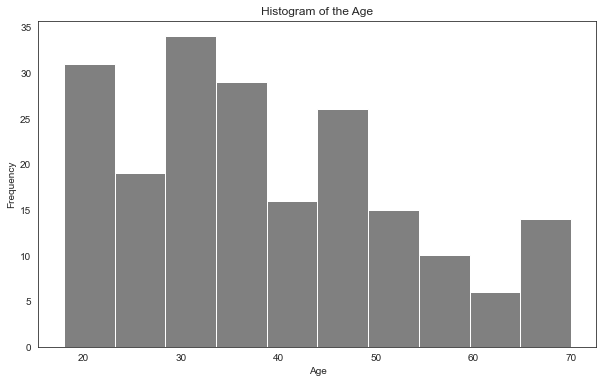

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("white")
df.Age.plot.hist(color='gray')# bins default as 10
#same result: df.Income.plot.hist(color='gray', bins=10)
plt.xlabel('Age')
plt.title('Histogram of the Age')
plt.show()

#### 2.2.3. Income

<Figure size 720x432 with 0 Axes>

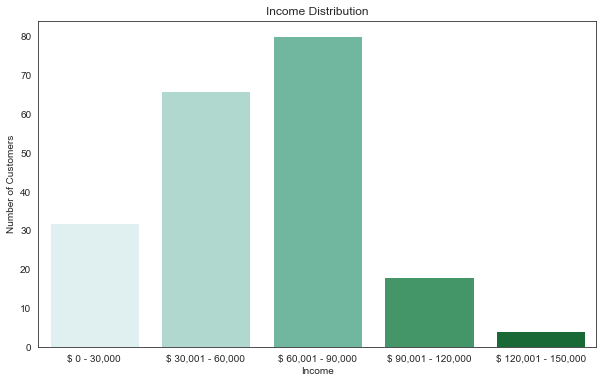

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("white")
ai0_30 = df["Income"][(df["Income"] >= 0) & (df["Income"] <= 30)]
ai31_60 = df["Income"][(df["Income"] >= 31) & (df["Income"] <= 60)]
ai61_90 = df["Income"][(df["Income"] >= 61) & (df["Income"] <= 90)]
ai91_120 = df["Income"][(df["Income"] >= 91) & (df["Income"] <= 120)]
ai121_150 = df["Income"][(df["Income"] >= 121) & (df["Income"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(10, 6))
sns.barplot(x=aix, y=aiy, palette="BuGn")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()

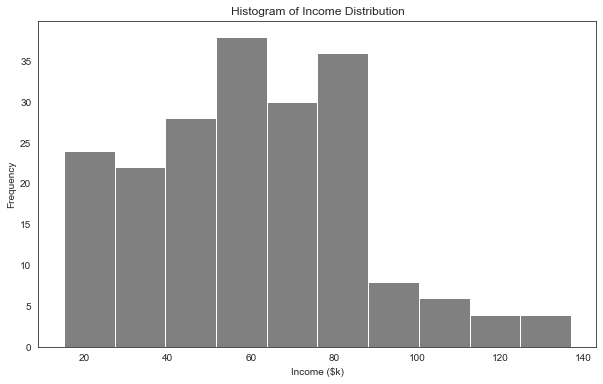

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("white")
df.Income.plot.hist(color='gray')# bins default as 10
#same result: df.Income.plot.hist(color='gray', bins=10)
plt.xlabel('Income ($k)')
plt.title('Histogram of Income Distribution')
plt.show()

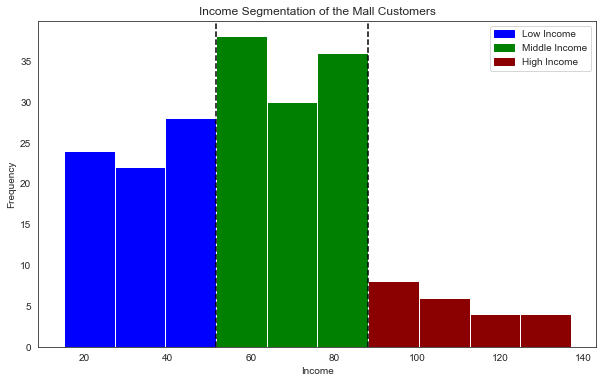

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("white")
df.Income.plot.hist(color='gray')  # Plotting a gray histogram for all incomes

# Calculate the bin edges
_, bins, _ = plt.hist(df.Income, color='gray')
# Retrieve the patches
_, _, patches = plt.hist(df.Income, color='gray')

# Set the color of the first three bars to blue
for i in range(3):
    patches[i].set_facecolor('blue')

# Set the color of the next three bars to green
for i in range(3, 6):
    patches[i].set_facecolor('green')

# Set the color of the remaining bars to dark red
for i in range(6, len(patches)):
    patches[i].set_facecolor('darkred')

# Draw dashed reference lines on the third and sixth bars
plt.axvline(x=bins[3], color='black', linestyle='dashed')
plt.axvline(x=bins[6], color='black', linestyle='dashed')

# Add legend
legend_labels = ['Low Income', 'Middle Income', 'High Income']
legend_colors = ['blue', 'green', 'darkred']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
plt.legend(legend_patches, legend_labels)

# Display the plot
plt.xlabel('Income')
plt.title('Income Segmentation of the Mall Customers')
plt.show()

In [ ]:
df['Cluster'] = np.where(df.Income >= 90, 'High Income', \
np.where(df.Income < 50, \
'Low Income', 'Moderate Income'))

In [ ]:
df.groupby('Cluster')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High Income,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Low Income,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Moderate Income,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


## 3. Clustering analysis

### 3.1. Standardize the data

To calculate their z-score.
This is done in two steps, for each column:
1. First, subtract the mean of the data from each data point. This centers the data
around 0, to make the data easier to look at and interpret, although this is not
strictly required for clustering.
2. The second step is to divide the parameters by their standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
cols_to_scale = ['Age', 'Income', 'Spend_score']
df_scaled = df.copy()

In [ ]:
df_scaled[cols_to_scale] = scaler.fit_transform\
(df[cols_to_scale])

In [ ]:
df_scaled[cols_to_scale].describe()

,Age,Income,Spend_score
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-9.603429e-17,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


In [ ]:
df_scaled=df_scaled[cols_to_scale]
df_scaled.head(3)

,Age,Income,Spend_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913


In [ ]:
cluster_cols = ['Income', 'Spend_score']
df_clus_var=df_scaled[cluster_cols]
df_clus_var.head(3)


,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


### 3.2 Different appraches to Decide K (How many clusters)

#### 3.2.1. Simple Visual Inspection to Choose the Optimal K

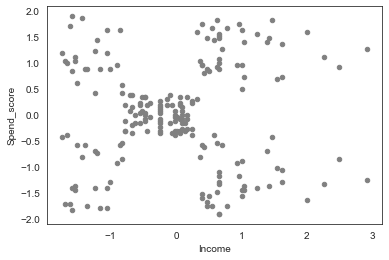

In [ ]:
df_scaled.plot.scatter(x='Income', y='Spend_score', color='gray')
plt.show()

It seems to be 5 clusters

**Clusters are better when they are well separated, without too much overlap, and
when they capture the most densely populated parts of the data space.**

#### 3.2.2. The Elbow Method with Sum of Squared Errors

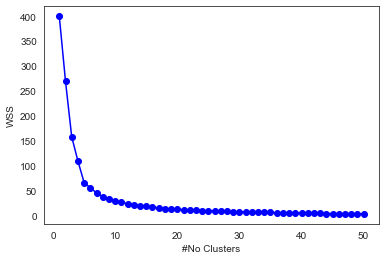

In [ ]:
import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")  # Ignore warning messages

cluster_range = range(1,51)
cluster_wss = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster)
    clusters.fit(df_clus_var)
    cluster_wss.append(clusters.inertia_)


plt.xlabel('#No Clusters')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker = 'o', color='blue')
plt.show()

There is an Elbow at 5, so we consider 5 clusters is the best.<br>
**The definition of an elbow in the plot, where the gain in terms of reduced errors seems to slow down for each new cluster.**

#### 3.2.3. The Silhouette Score to Pick Optimal Number of Clusters

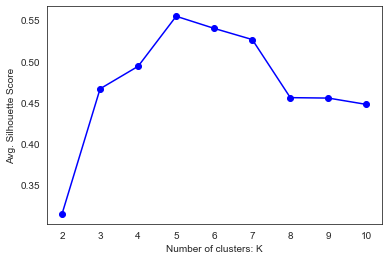

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for K in range(2, 11):
    model = KMeans(n_clusters=K, random_state=42)
    cluster_assignments = model.fit_predict(df_clus_var)
    silhouette_avg = silhouette_score(df_clus_var, cluster_assignments)
    silhouette_scores.append(silhouette_avg)


plt.plot(range(2,11), silhouette_scores, marker = 'o', color='blue')
plt.xlabel("Number of clusters: K")
plt.ylabel('Avg. Silhouette Score')
plt.show()

K=5 has the best silhouette score and is therefore the optimal number of clusters.<br>
Based on these three method, K=5 is the optimal choice for clustering.

### 3.3. Clustering method

#### 3.3.1. K-means

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)

In [ ]:
model.fit(df_clus_var)

df_scaled['Cluster'] = model.predict(df_clus_var)

In [ ]:
df_scaled.head(3)

,Age,Income,Spend_score,Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,3
2,-1.352802,-1.700830,-1.715913,2


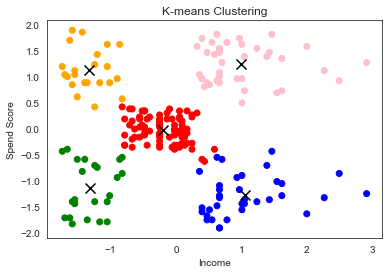

In [ ]:
sns.set_style("white")
colors = ['red', 'blue', 'green', 'orange', 'pink']
K = 5  # you may choose your own K
kmeans = KMeans(n_clusters=K, random_state=42)

# cluster membership for each data point
clusters = kmeans.fit_predict(df_scaled[['Income', 'Spend_score']])
plt.scatter(df_scaled['Income'], df_scaled['Spend_score'], c=[colors[label] for label in clusters])

# get centroids
centers = kmeans.cluster_centers_

# plot the clusters and centroids

plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100)
plt.xlabel('Income')
plt.ylabel('Spend Score')
plt.title("K-means Clustering")
plt.show()

In [ ]:
centers

array([[-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275]])

It's good to know the center of the cluser. However, it's scaled, so in the next step, we unscaled the data to know the feature of each centers.

In [ ]:
mean_values = scaler.mean_
mean_values

array([38.85, 60.56, 50.2 ])

In [ ]:
std_values = scaler.scale_
std_values

array([13.93404105, 26.19897708, 25.75888196])

In [ ]:
mean_values = scaler.mean_
age_mean = mean_values[0]
spend_score_mean = mean_values[2]
mean_matrix = np.array([[age_mean, spend_score_mean ],
                               [age_mean, spend_score_mean ],
                               [age_mean, spend_score_mean ],
                               [age_mean, spend_score_mean ],
                               [age_mean, spend_score_mean ]])
mean_matrix

array([[38.85, 50.2 ],
       [38.85, 50.2 ],
       [38.85, 50.2 ],
       [38.85, 50.2 ],
       [38.85, 50.2 ]])

In [ ]:
std_values = scaler.scale_
age_std = std_values[0]
spend_std_std = std_values[2]
std_matrix = np.array([[age_std, spend_std_std ],
                               [age_std, spend_std_std ],
                               [age_std, spend_std_std ],
                               [age_std, spend_std_std ],
                               [age_std, spend_std_std ]])
std_matrix

array([[13.93404105, 25.75888196],
       [13.93404105, 25.75888196],
       [13.93404105, 25.75888196],
       [13.93404105, 25.75888196],
       [13.93404105, 25.75888196]])

In [ ]:
centers_value=(centers*std_matrix)+mean_matrix
centers_value # unscale centers

array([[36.05047606, 49.51851852],
       [53.55045542, 17.11428571],
       [20.63098091, 20.91304348],
       [20.32406098, 79.36363636],
       [52.66675889, 82.12820513]])

            Income  Spend score
cluster                        
0        36.050476    49.518519
1        53.550455    17.114286
2        20.630981    20.913043
3        20.324061    79.363636
4        52.666759    82.128205


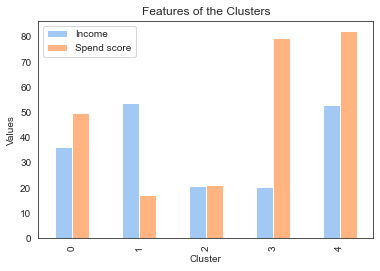

In [ ]:
centers_value = pd.DataFrame(centers_value, columns=['Income', 'Spend score']).rename_axis('cluster')
print(centers_value)

# Plot the bar plot
centers_value.plot.bar()

# Customize the plot (optional)
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.title('Features of the Clusters')

# Show the plot
plt.show()

#### Descibe each segmentation

Based on the income and Spending score, 5 clusters can be categorized as:<br>
(the exact average value can refer to the above table)
- Cluster 0: Midium income, Midum Spending Score
- Cluster 1: High income, Low Spending Score
- Cluster 2: Low income, Low Spending Score
- Cluster 3: Low income, High Spending Score
- Cluster 4: High income, High Spending Score

#### 3.3.2. Hierarchical Clustering
K=3 in this example, from the below graph, we can realize the relationship of data based on different number of the cluster.

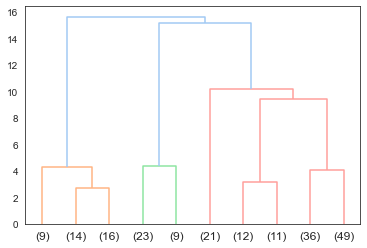

In [ ]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_scaled[['Income','Spend_score']], 'ward') # use ward linkage
dn = dendrogram(Z, truncate_mode='lastp', p=10) # show last 10 clusters
plt.show()

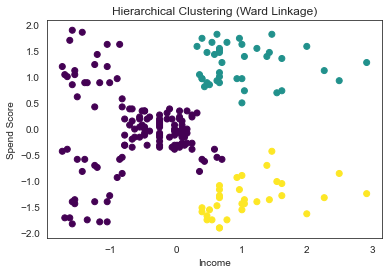

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(df_scaled[['Income', 'Spend_score']])

plt.scatter(df_scaled['Income'], df_scaled['Spend_score'], c=cluster_labels, cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Spend Score')
plt.title('Hierarchical Clustering (Ward Linkage)')
plt.show()

### 4. Dealing with High-Dimensional Data

Explanation of PCA: https://www.youtube.com/watch?v=FgakZw6K1QQ

In [ ]:
df_scaled_pca=df_scaled[['Age','Income','Spend_score']]
df_scaled_pca.head(3)

,Age,Income,Spend_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913


In [ ]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df_scaled_pca)

KMeans(n_clusters=4, random_state=42)

In [ ]:
df_scaled['Cluster'] = model.predict(df_scaled_pca)

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(df_scaled_pca)

df_scaled['pc1'] = pca_res[:,0]
df_scaled['pc2'] = pca_res[:,1]
df_scaled_pca_var=pca_res[:,0:2]


In [ ]:
# PCA function in sklearn
from sklearn.decomposition import PCA
p=df_scaled_pca.shape[1]

pca = PCA(n_components=p)
PCs = pca.fit_transform(df_scaled_pca)

print('Amount of variance explained by PCs:', pca.explained_variance_)

data = {'k-th PC': range(1,p+1),
        'Ratio of variance': pca.explained_variance_ratio_}

df_pca_var = pd.DataFrame(data)
df_pca_var

Amount of variance explained by PCs: [1.33465831 1.00427272 0.67614435]


,k-th PC,Ratio of variance
0,1,0.442662
1,2,0.333084
2,3,0.224255


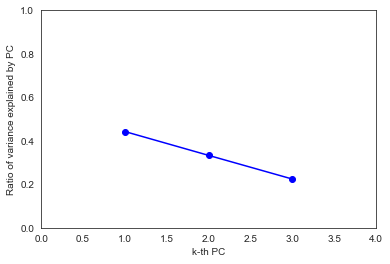

In [ ]:
# visualize the ratio of variance explained by PCs
plt.xlabel("k-th PC")
plt.ylabel(r'Ratio of variance explained by PC')
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0,xmax=p+1)
plt.plot(range(1,p+1),pca.explained_variance_ratio_, linestyle='-', marker='o', color='blue')
plt.show()

pc1 and pc2 combined will include 77% of the variance (44%+33%)

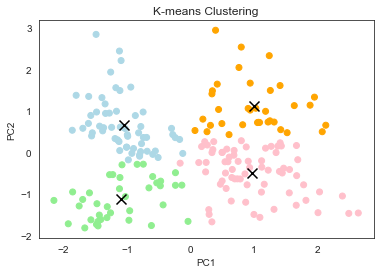

In [ ]:
sns.set_style("white")
colors = ['pink', 'lightblue', 'lightgreen', 'orange']

K = 4  # you may choose your own K
kmeans = KMeans(n_clusters=K, random_state=42)

# cluster membership for each data point
clusters = kmeans.fit_predict(df_scaled_pca_var)

# create an array of colors for each data point based on cluster assignment
plt.scatter(df_scaled['pc1'], df_scaled['pc2'],  c=[colors[label] for label in clusters])

# get centroids
centers = kmeans.cluster_centers_

# plot the clusters and centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100)
plt.title("K-means Clustering")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
df['Cluster'] = df_scaled.Cluster

In [ ]:
df.groupby('Cluster')[['Age', 'Income', 'Spend_score']].mean()

,Age,Income,Spend_score
Cluster,,,
0,39.368421,86.500000,19.578947
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,53.984615,47.707692,39.969231


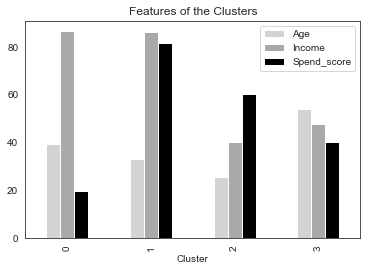

In [ ]:
df.groupby('Cluster')[['Age', 'Income', \
                          'Spend_score']].mean() \
     .plot.bar(color=['lightgray', 'darkgray', 'black'])
plt.title('Features of the Clusters')
plt.show()

#### Descibe each segmentation
Based on the PC1 and PC2, 4 clusters can be categorized as:<br>
(the exact average value can refer to the above table)

- Cluster 0: Middle-aged penny pinchers (high income, low spend)
- Cluster 1: Young high rollers (younger age, high income, high spend)
- Cluster 2: Young aspirers (low income, high spend)
- Cluster 3: Old average Joes (average income, average spend)

### 5. Using a Train-Test Split to Evaluate Clustering Performance

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train data set split the data
df_train, df_test = train_test_split\
                    (df_scaled_pca_var, train_size=0.65, \
                     random_state=42)

In [ ]:
# train data set
df_train = pd.DataFrame(df_train, columns=['pc1', 'pc2'])
df_train.head(3)

,pc1,pc2
0,-0.531217,-0.734623
1,-1.189064,0.334812
2,0.195435,0.802618


In [ ]:
# train data set
df_test = pd.DataFrame(df_test, columns=['pc1', 'pc2'])
df_test.head(3)

,pc1,pc2
0,-0.801139,-0.056112
1,-1.569432,-1.625027
2,2.394820,-1.051593


In [ ]:
# show the data shape
print(df_train.shape) #130 rows  2 cols
print(df_test.shape)   #70 rows  2 cols

(130, 2)
(70, 2)


In [ ]:
model = KMeans(n_clusters=4, random_state=42)
df_train['Cluster'] = model.fit_predict(df_train)
centers_train = kmeans.cluster_centers_
silhouette_avg = silhouette_score\
                 (df_train, df_train['Cluster'])
print("the average silhouette score of train data is", silhouette_avg)

the average silhouette score of train data is 0.5801302502979514


In [ ]:
print(centers_train) # show the cluster centers

[[ 0.97771498 -0.49877873]
 [-1.04671072  0.65699063]
 [-1.09453687 -1.11878664]
 [ 0.99540827  1.10926194]]


In [ ]:
df_test['Cluster'] = model.predict(df_test)
silhouette_avg = silhouette_score\
                 (df_test,df_test['Cluster'])
print("the average silhouette score of test data is", silhouette_avg)

the average silhouette score of test data is 0.6024311888724854


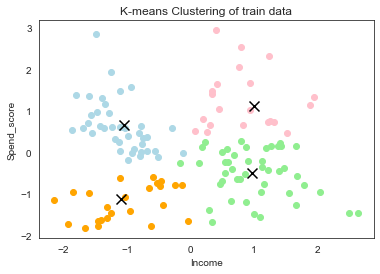

In [ ]:
colors = ['pink', 'lightblue', 'lightgreen', 'orange']   # Define colors for each cluster

for clust in range(df_test.Cluster.nunique()):
    temp = df_train[df_train.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, \
                #marker=markers[clust], \
                color=colors[clust])

# Plot the clusters and centroids
plt.scatter(centers_train[:, 0], centers_train[:, 1], c='black', marker='x', s=100)
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.title("K-means Clustering of train data")
plt.show()


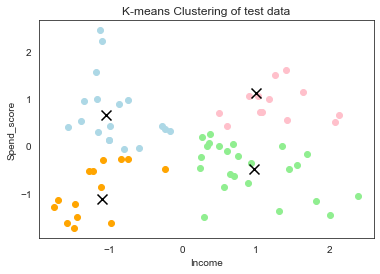

In [ ]:
colors = ['pink', 'lightblue', 'lightgreen', 'orange']  # Define colors for each cluster

for clust in range(df_test.Cluster.nunique()):
    temp = df_test[df_test.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, \
                #marker=markers[clust], \
                color=colors[clust])
    centers = kmeans.cluster_centers_

# Plot the clusters and centroids
plt.scatter(centers_train[:, 0], centers_train[:, 1], c='black', marker='x', s=100)
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.title("K-means Clustering of test data")
plt.show()

### 6. Summary

The advantage of machine learning-based clustering is its ability to expedite the segmentation process and discover patterns without requiring extensive domain knowledge. There are various methods available for ML clustering, such as K-means, K-medians, and hierarchical clustering, each with its own strengths and limitations. In our specific case, K-means necessitates predefining the number of clusters (K), whereas hierarchical clustering can generate cluster groups based on different K values. It is crucial to compare the results of these techniques objectively.

Moreover, the choice of the number of segments (K) should align with business requirements. Fewer segments can provide a simplified and interpretable understanding of customers, while more segments allow for a finer-grained customer segmentation. However, the clusters, regardless of their quality, hold no significance if they are not actionable for the business. Non-actionability can arise in two ways:

- The clusters lack business rationale.
- The number of clusters is excessively large.

In essence, machine learning techniques must consider business value and strategy to ensure that the insights derived are meaningful and actionable. By doing so, these insights become invaluable and can drive impactful business decisions.

### 7. Reference:

- Baig, M. R., Govindan, G., & Shrimali, V. R. (2021). Data Science for Marketing Analytics: A practical guide to forming a killer marketing strategy through data analysis with Python (2nd ed.), Chapter 3: Unsupervised Learning and
Customer Segmentation (pp. 113-159). Packt Publishing.
- Sagar, A. (2019, August 24). Customer Segmentation Using K Means Clustering. https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3.